In [11]:
%%capture
!pip install pandas
!pip install matplotlib
!pip install numpy


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np


In [48]:
with open('./data/dreps_data.json', 'r') as file:
    data = json.load(file)
    df = pd.DataFrame(data["rows"])
df['live_stake'] = pd.to_numeric(df['live_stake'], errors='coerce') / 1_000_000
print(df["live_stake"].tail())
print(df.columns)

926    0.0
927    0.0
928    0.0
929    0.0
930    0.0
Name: live_stake, dtype: float64
Index(['hash', 'bech32_legacy', 'has_script', 'tx_hash', 'url', 'comment',
       'payment_address', 'given_name', 'objectives', 'motivations',
       'qualifications', 'image', 'live_stake', 'delegator', 'tx_time',
       'last_active_epoch', 'bech32'],
      dtype='object')


In [49]:
def calculate_data_for_lorenz(df,column:str):
    # Convert 'live_stake' to numeric (in case it's a string)
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

    # Sort the values in ascending order
    sorted_stake = np.sort(df[column].values)

    # Calculate cumulative share of stake
    cumulative_stake = np.cumsum(sorted_stake)
    cumulative_stake_share = cumulative_stake / cumulative_stake[-1]  # normalize to 1

    # Calculate cumulative share of entities (e.g., voters or delegators)
    n = len(sorted_stake)
    cumulative_entities = np.arange(1, n + 1) / n
    return cumulative_entities, cumulative_stake_share
    

In [18]:
kneset_data = [32,24,14,12,11,7,6,5,5,4]
df_knestet = pd.DataFrame(kneset_data, columns=["seats"])


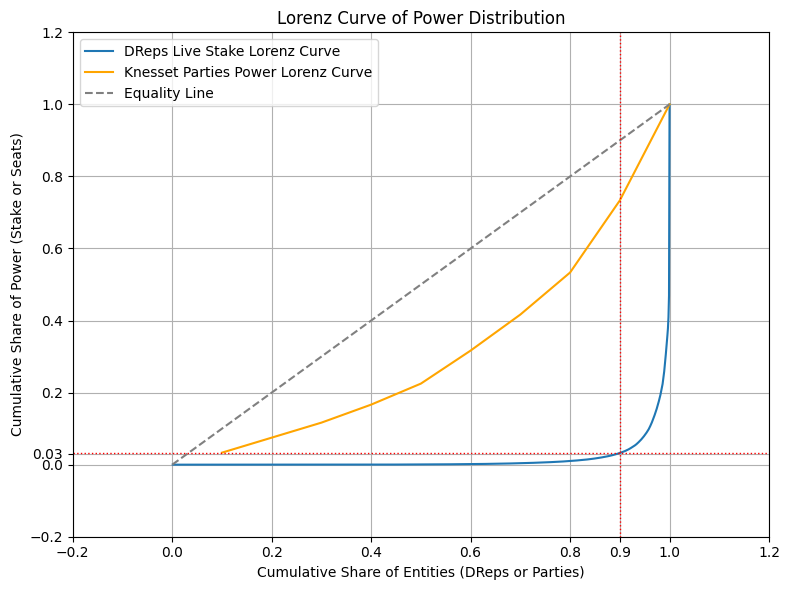

In [77]:

# Calculate Lorenz data
cumulative_entities_drep_live_stake, cumulative_stake_share_drep_live_stake = calculate_data_for_lorenz(df, "live_stake")
cumulative_entities_kneset, cumulative_stake_share_kneset = calculate_data_for_lorenz(df_knestet, "seats")

# Calculate DRep top 10% power
live_stakes = pd.to_numeric(df['live_stake'], errors='coerce').fillna(0).sort_values().values
total_stake = live_stakes.sum()
cutoff_10 = int(len(live_stakes) * 0.9)
top_10_power = live_stakes[cutoff_10:].sum() / total_stake

# Plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_entities_drep_live_stake, cumulative_stake_share_drep_live_stake,
         label='DReps Live Stake Lorenz Curve')
plt.plot(cumulative_entities_kneset, cumulative_stake_share_kneset,
         label='Knesset Parties Power Lorenz Curve', color='orange')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Equality Line')

# Add 10% vertical and horizontal insight lines
plt.axvline(0.9, color='red', linestyle=':', linewidth=1)
plt.axhline(1 - top_10_power, color='red', linestyle=':', linewidth=1)

# Add tick labels at those points without removing default ticks
xticks, xticklabels = plt.xticks()
yticks, yticklabels = plt.yticks()

# Add 90% to x-axis ticks
if 0.9 not in xticks:
    xticks = np.append(xticks, 0.9)
    xticklabels = list(xticklabels) + ['0.9']

# Add corresponding y-axis label
rounded_y = round(1 - top_10_power, 2)
if rounded_y not in yticks:
    yticks = np.append(yticks, rounded_y)
    yticklabels = list(yticklabels) + [f'{rounded_y}']

plt.xticks(xticks, xticklabels)
plt.yticks(yticks, yticklabels)

# Final plot setup
plt.title("Lorenz Curve of Power Distribution")
plt.xlabel("Cumulative Share of Entities (DReps or Parties)")
plt.ylabel("Cumulative Share of Power (Stake or Seats)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('lurenz_curve.pdf')
plt.show()

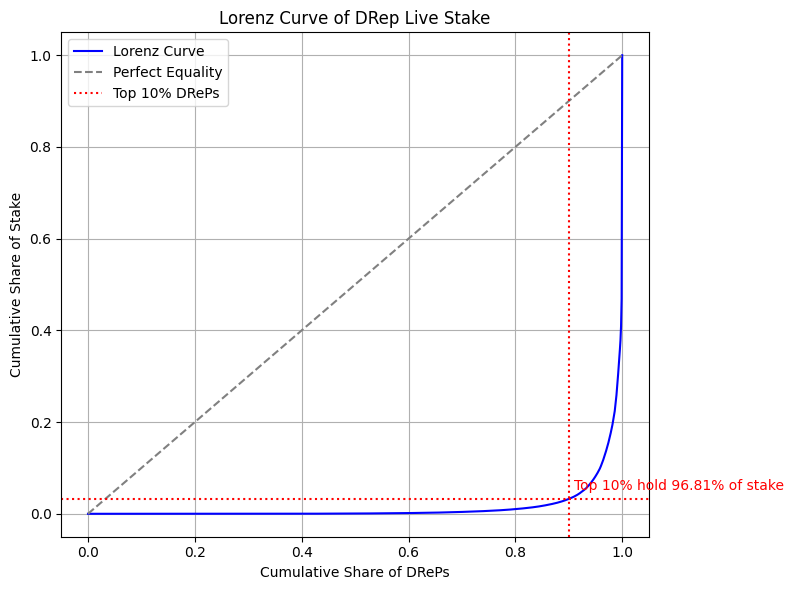

In [53]:
# Make sure live_stake is numeric and drop NaNs
df['live_stake'] = pd.to_numeric(df['live_stake'], errors='coerce').fillna(0)
stakes = df['live_stake'].sort_values().values

# Normalize the values
cumulative_stake = np.cumsum(stakes)
total_stake = cumulative_stake[-1]
lorenz_y = cumulative_stake / total_stake
lorenz_x = np.linspace(0, 1, len(stakes))

# Plot Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(lorenz_x, lorenz_y, label="Lorenz Curve", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Equality")

# Compute top 10% power share
top_10_cutoff_index = int(len(stakes) * 0.9)
power_top_10_percent = stakes[top_10_cutoff_index:].sum() / total_stake

# Annotate it
plt.axvline(0.9, color='red', linestyle=':', label='Top 10% DRePs')
plt.axhline(1 - power_top_10_percent, color='red', linestyle=':')
plt.text(0.91, 1 - power_top_10_percent + 0.02,
         f"Top 10% hold {power_top_10_percent:.2%} of stake",
         color='red')

# Labels and legend
plt.title("Lorenz Curve of DRep Live Stake")
plt.xlabel("Cumulative Share of DRePs")
plt.ylabel("Cumulative Share of Stake")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

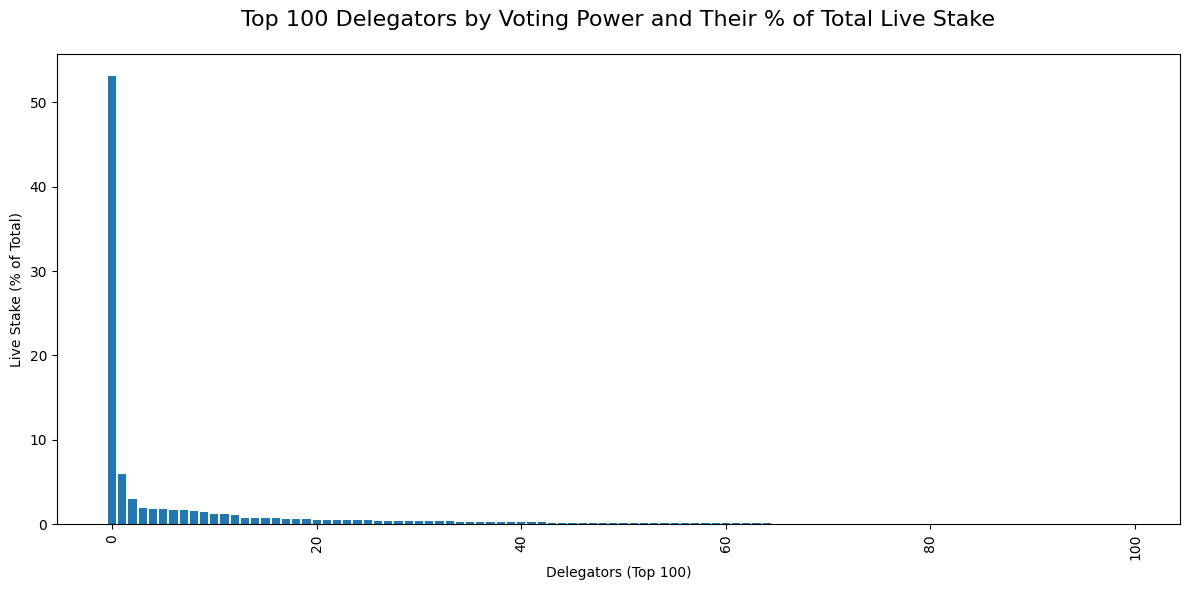

In [80]:
# Sort and select top 100
top_df = df.sort_values('live_stake', ascending=False).head(100)

# Compute percentage of total stake
total_stake = df['live_stake'].sum()
top_df['stake_pct'] = top_df['live_stake'] / total_stake * 100

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(100), top_df['stake_pct'])
plt.xticks(rotation=90)
plt.title("Top 100 Delegators by Voting Power and Their % of Total Live Stake", fontsize=16, pad=20)
plt.ylabel("Live Stake (% of Total)")
plt.xlabel("Delegators (Top 100)")
plt.tight_layout()
plt.savefig("top_100_delegators.pdf")
plt.show()

In [74]:
participation_list = "83.33%50.00%83.33%33.33%83.33%66.67%60.00%50.00%83.33%83.33%83.33%50.00%100.00%83.33%50.00%83.33%83.33%66.67%66.67%33.33%66.67%100.00%100.00%83.33%83.33%100.00%50.00%83.33%83.33%83.33%100.00%33.33%16.67%100.00%83.33%100.00%33.33%66.67%50.00%100.00%83.33%66.67%66.67%83.33%83.33%100.00%83.33%83.33%66.67%83.33%100.00%16.67%83.33%66.67%83.33%66.67%100.00%83.33%50.00%83.33%83.33%83.33%33.33%83.33%16.67%50.00%83.33%100.00%0.00%0.00%0.00%100.00%100.00%50.00%83.33%50.00%83.33%66.67%83.33%50.00%83.33%66.67%50.00%0.00%83.33%100.00%83.33%0.00%66.67%83.33%100.00%100.00%16.67%100.00%83.33%33.33%33.33%66.67%83.33%66.67%100.00%33.33%33.33%83.33%100.00%83.33%66.67%100.00%83.33%50.00%100.00%16.67%83.33%100.00%100.00%50.00%66.67%50.00%50.00%16.67%100.00%83.33%83.33%50.00%50.00%66.67%33.33%83.33%66.67%83.33%50.00%83.33%16.67%16.67%66.67%83.33%100.00%50.00%83.33%83.33%66.67%66.67%66.67%33.33%83.33%16.67%50.00%100.00%33.33%83.33%83.33%16.67%33.33%0.00%50.00%33.33%83.33%0.00%0.00%66.67%100.00%0.00%50.00%16.67%83.33%83.33%66.67%50.00%33.33%16.67%100.00%33.33%83.33%83.33%100.00%66.67%50.00%83.33%66.67%33.33%100.00%16.67%66.67%66.67%0.00%16.67%0.00%83.33%0.00%100.00%66.67%33.33%83.33%33.33%83.33%0.00%16.67%0.00%83.33%100.00%83.33%83.33%16.67%100.00%40.00%33.33%83.33%50.00%0.00%16.67%66.67%66.67%83.33%16.67%100.00%0.00%100.00%83.33%16.67%0.00%33.33%100.00%0.00%83.33%50.00%50.00%66.67%66.67%33.33%0.00%0.00%50.00%66.67%83.33%0.00%100.00%16.67%33.33%100.00%100.00%83.33%16.67%33.33%100.00%50.00%66.67%33.33%66.67%33.33%16.67%0.00%0.00%0.00%16.67%83.33%0.00%0.00%0.00%83.33%83.33%83.33%100.00%66.67%83.33%100.00%83.33%100.00%33.33%16.67%80.00%0.00%16.67%83.33%0.00%0.00%83.33%0.00%50.00%16.67%0.00%75.00%0.00%0.00%83.33%50.00%33.33%0.00%33.33%100.00%50.00%83.33%0.00%0.00%66.67%0.00%33.33%100.00%83.33%16.67%33.33%83.33%66.67%50.00%0.00%0.00%33.33%16.67%66.67%50.00%66.67%100.00%100.00%0.00%0.00%33.33%0.00%50.00%33.33%83.33%100.00%100.00%50.00%16.67%100.00%33.33%83.33%83.33%50.00%0.00%0.00%33.33%50.00%66.67%50.00%0.00%16.67%33.33%50.00%66.67%0.00%66.67%16.67%83.33%33.33%16.67%0.00%83.33%0.00%0.00%0.00%83.33%0.00%66.67%100.00%100.00%83.33%0.00%0.00%83.33%0.00%100.00%100.00%16.67%50.00%0.00%100.00%33.33%0.00%66.67%0.00%50.00%0.00%50.00%83.33%50.00%0.00%0.00%83.33%33.33%33.33%33.33%83.33%50.00%0.00%33.33%50.00%83.33%0.00%66.67%33.33%33.33%50.00%0.00%66.67%66.67%0.00%66.67%100.00%33.33%100.00%0.00%0.00%33.33%0.00%0.00%0.00%50.00%50.00%66.67%16.67%83.33%0.00%16.67%0.00%0.00%66.67%100.00%0.00%83.33%83.33%0.00%100.00%66.67%0.00%66.67%0.00%0.00%16.67%0.00%83.33%0.00%0.00%0.00%0.00%16.67%0.00%0.00%50.00%66.67%33.33%66.67%33.33%50.00%0.00%83.33%0.00%0.00%0.00%0.00%83.33%50.00%33.33%100.00%83.33%50.00%0.00%0.00%83.33%50.00%0.00%16.67%0.00%0.00%0.00%83.33%83.33%33.33%0.00%0.00%66.67%16.67%83.33%66.67%50.00%0.00%0.00%0.00%0.00%0.00%33.33%50.00%0.00%0.00%0.00%0.00%100.00%0.00%50.00%100.00%16.67%0.00%16.67%33.33%83.33%100.00%50.00%0.00%16.67%66.67%0.00%0.00%20.00%0.00%0.00%33.33%33.33%0.00%50.00%16.67%50.00%0.00%16.67%66.67%33.33%16.67%50.00%0.00%33.33%0.00%33.33%0.00%33.33%0.00%66.67%16.67%0.00%0.00%0.00%83.33%0.00%0.00%0.00%16.67%0.00%50.00%100.00%0.00%16.67%16.67%83.33%0.00%0.00%83.33%100.00%66.67%0.00%0.00%50.00%0.00%33.33%0.00%0.00%33.33%0.00%0.00%0.00%0.00%83.33%66.67%0.00%0.00%100.00%0.00%0.00%16.67%83.33%0.00%0.00%25.00%0.00%0.00%0.00%0.00%0.00%0.00%33.33%100.00%0.00%66.67%40.00%83.33%50.00%0.00%50.00%0.00%0.00%0.00%33.33%16.67%33.33%0.00%66.67%16.67%0.00%33.33%16.67%0.00%0.00%0.00%66.67%50.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%33.33%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%66.67%25.00%50.00%0.00%83.33%0.00%0.00%16.67%50.00%100.00%0.00%0.00%0.00%0.00%0.00%0.00%66.67%0.00%0.00%0.00%33.33%0.00%33.33%16.67%0.00%66.67%0.00%50.00%40.00%0.00%83.33%0.00%0.00%16.67%0.00%0.00%0.00%83.33%0.00%0.00%16.67%0.00%66.67%0.00%0.00%33.33%0.00%66.67%0.00%16.67%0.00%0.00%0.00%33.33%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%50.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%83.33%50.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%16.67%0.00%33.33%0.00%40.00%0.00%0.00%33.33%0.00%0.00%0.00%16.67%16.67%0.00%0.00%50.00%0.00%100.00%0.00%0.00%0.00%0.00%0.00%0.00%75.00%0.00%50.00%16.67%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%16.67%0.00%0.00%0.00%0.00%83.33%0.00%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%83.33%0.00%0.00%0.00%0.00%0.00%25.00%0.00%0.00%0.00%16.67%0.00%33.33%0.00%50.00%0.00%0.00%0.00%0.00%0.00%0.00%33.33%33.33%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%66.67%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%0.00%".split('%')
participation_list = [float(x) for x in data if x!='']
print(participation_list)

[83.33, 50.0, 83.33, 33.33, 83.33, 66.67, 60.0, 50.0, 83.33, 83.33, 83.33, 50.0, 100.0, 83.33, 50.0, 83.33, 83.33, 66.67, 66.67, 33.33, 66.67, 100.0, 100.0, 83.33, 83.33, 100.0, 50.0, 83.33, 83.33, 83.33, 100.0, 33.33, 16.67, 100.0, 83.33, 100.0, 33.33, 66.67, 50.0, 100.0, 83.33, 66.67, 66.67, 83.33, 83.33, 100.0, 83.33, 83.33, 66.67, 83.33, 100.0, 16.67, 83.33, 66.67, 83.33, 66.67, 100.0, 83.33, 50.0, 83.33, 83.33, 83.33, 33.33, 83.33, 16.67, 50.0, 83.33, 100.0, 0.0, 0.0, 0.0, 100.0, 100.0, 50.0, 83.33, 50.0, 83.33, 66.67, 83.33, 50.0, 83.33, 66.67, 50.0, 0.0, 83.33, 100.0, 83.33, 0.0, 66.67, 83.33, 100.0, 100.0, 16.67, 100.0, 83.33, 33.33, 33.33, 66.67, 83.33, 66.67, 100.0, 33.33, 33.33, 83.33, 100.0, 83.33, 66.67, 100.0, 83.33, 50.0, 100.0, 16.67, 83.33, 100.0, 100.0, 50.0, 66.67, 50.0, 50.0, 16.67, 100.0, 83.33, 83.33, 50.0, 50.0, 66.67, 33.33, 83.33, 66.67, 83.33, 50.0, 83.33, 16.67, 16.67, 66.67, 83.33, 100.0, 50.0, 83.33, 83.33, 66.67, 66.67, 66.67, 33.33, 83.33, 16.67, 50.0, 10

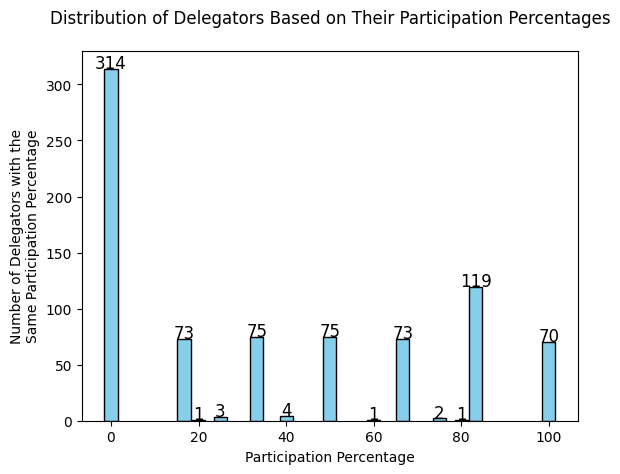

In [93]:
unique_percentages, counts = np.unique(participation_list, return_counts=True)

# Plot the bar chart with exact percentages
plt.bar(unique_percentages, counts, color='skyblue', edgecolor='black', width=3)

# Add labels and title
plt.xlabel("Participation Percentage")
plt.ylabel("Number of Delegators with the\nSame Participation Percentage")
# Add a title to the chart
plt.title("Distribution of Delegators Based on Their Participation Percentages", fontsize=12, pad=20)


# Show percentage labels on top of the bars
for i in range(len(unique_percentages)):
    plt.text(unique_percentages[i], counts[i] + 0.5, str(counts[i]), ha='center', fontsize=12)

# Save the plot to a PDF
plt.savefig("participation_distribution.pdf")

# Display the plot
plt.show()

In [123]:
#load csv to df
df = pd.read_csv('./data/Master - CRM MVP_ Top 100 Cardano DReps _ Trend Update Version - Weekly - WORKING VERSION.csv')

# create df from column 2 and column 3, 4
columns_index=[2, 3, 4,7,9]
for i in range(15,207,8):
    columns_index.append(i)
    columns_index.append(i+2)
df = df.iloc[:, columns_index]

df.columns.values[0] = 'DRep'
df.columns.values[1] = 'October 21, 2024'

for i in range(2, len(df.columns),2):
    df.columns.values[i] = df.columns.values[i-1]

for i in range(1, len(df.columns), 1):
    df.columns.values[i] = df.columns.values[i] + ' - Delegators' if i%2==1 else df.columns.values[i] + ' - Delegation'
# remove the first row
df = df.iloc[1:]
df= pd.melt(df, id_vars=['DRep'], var_name='Date', value_name='Value')
# Suppose df is your DataFrame and it has a column called 'Date'
df[['Date', 'Metric']] = df['Date'].str.split(' - ', expand=True)

#replace . with , for the date
df['Date'] = df['Date'].str.replace('.', ',')
# set Date as datetime while is Month day, year

df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%B %d, %Y')




df


,DRep,Date,Value,Metric
0,Always Abstain,2024-10-21,"5,164",Delegators
1,Yuta,2024-10-21,55,Delegators
2,EMURGO,2024-10-21,NaN,Delegators
3,Eternl DRep Committee,2024-10-21,"1,172",Delegators
4,blockdaemon,2024-10-21,NaN,Delegators
...,...,...,...,...
9459,-,2025-04-28,NaN,Delegation
9460,-,2025-04-28,NaN,Delegation
9461,LALKUL,2025-04-28,NaN,Delegation
9462,-,2025-04-28,NaN,Delegation


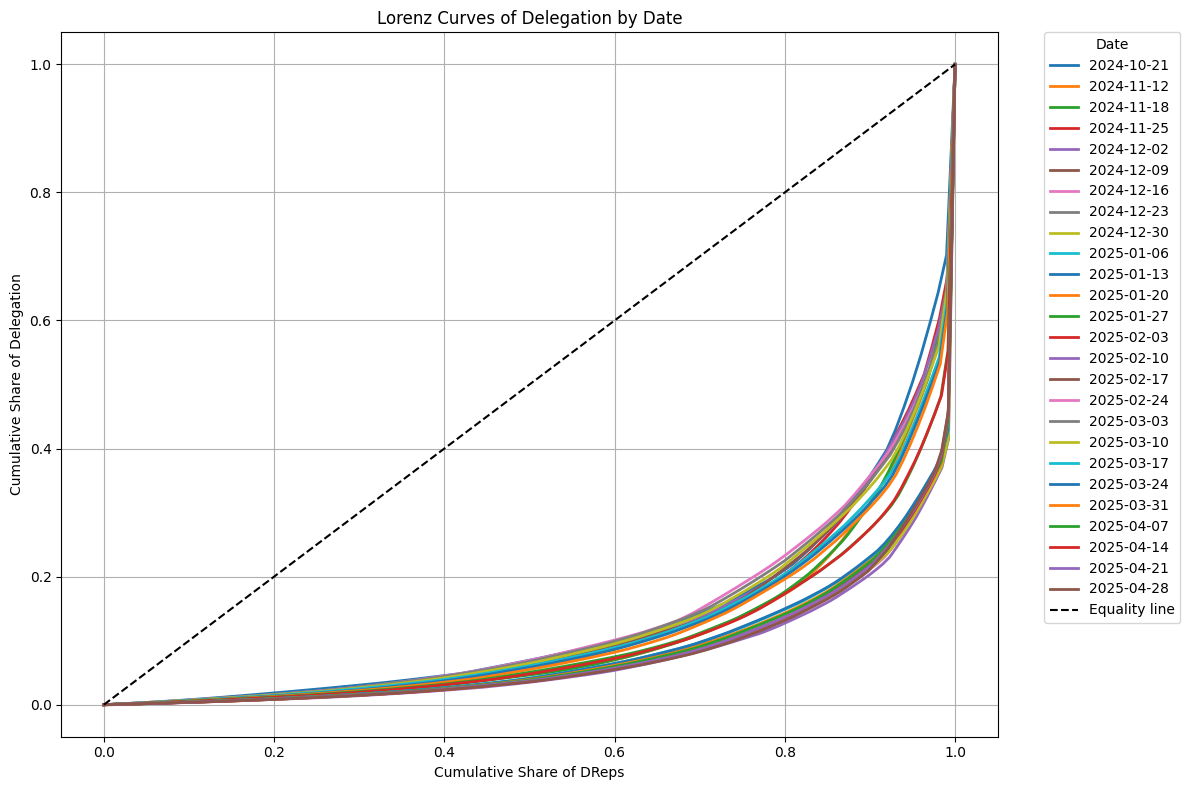

In [124]:
# Step 1: Clean 'Value' column (remove commas and convert to float)
df['Value'] = df['Value'].str.replace(',', '')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Step 2: Filter for 'Delegation' metric only
delegation_df = df[df['Metric'] == 'Delegation'].dropna(subset=['Value'])

# Step 3: Define Lorenz curve function
def lorenz_curve(values):
    values = np.sort(values)
    cumulative = np.cumsum(values)
    cumulative = np.insert(cumulative, 0, 0)
    cumulative = cumulative / cumulative[-1]
    x = np.linspace(0, 1, len(cumulative))
    return x, cumulative

plt.figure(figsize=(12, 8))  # Wider figure for room

for date, group in delegation_df.groupby('Date'):
    x, y = lorenz_curve(group['Value'].values)
    plt.plot(x, y, label=str(date.date()), linewidth=2)
    

plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Equality line')
plt.title('Lorenz Curves of Delegation by Date')
plt.xlabel('Cumulative Share of DReps')
plt.ylabel('Cumulative Share of Delegation')

# 🔄 Move legend outside the plot
plt.legend(
    title='Date',
    bbox_to_anchor=(1.05, 1),  # Push to the right
    loc='upper left',
    borderaxespad=0.
)

plt.grid(True)
plt.tight_layout()
plt.savefig("lorenz_curve_delegation_by_date.pdf")
plt.show()


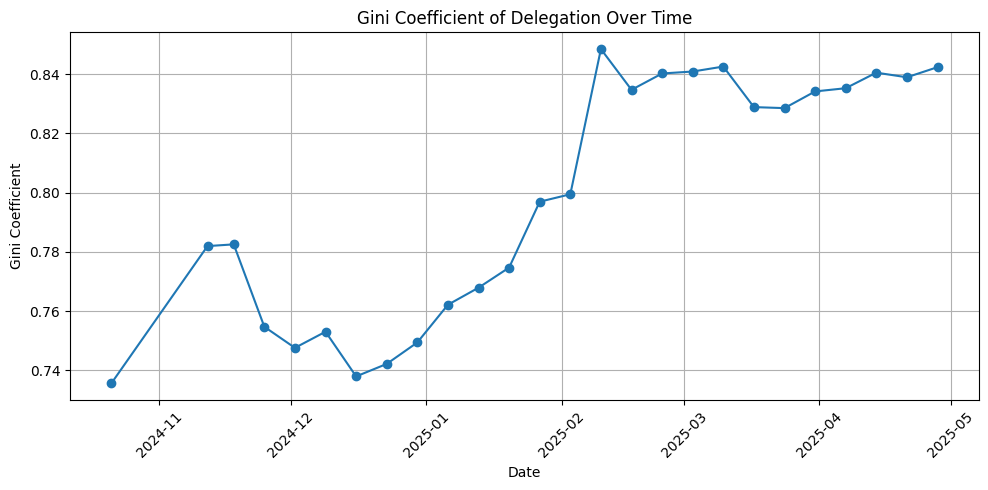

In [126]:
# 2. Filter for Delegation metric
delegation_df = df[df['Metric'] == 'Delegation'].dropna(subset=['Value'])

# 3. Gini coefficient function
def gini(array):
    if len(array) == 0:
        return np.nan
    array = np.sort(np.array(array))
    n = len(array)
    cumvals = np.cumsum(array)
    gini_coef = (n + 1 - 2 * np.sum(cumvals) / cumvals[-1]) / n
    return gini_coef

# 4. Calculate Gini per Date
gini_by_date = (
    delegation_df.groupby('Date')['Value']
    .apply(gini)
    .reset_index()
    .sort_values('Date')  # Sort by time
)

# 5. Plot
plt.figure(figsize=(12, 8))
plt.plot(gini_by_date['Date'], gini_by_date['Value'], marker='o')
plt.title('Gini Coefficient of Delegation Over Time')
plt.xlabel('Date')
plt.ylabel('Gini Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('gini_coefficient_delegation.pdf')

plt.show()
#save to pdf
